# CIS 5450 Final Project

Names: Andrew Yang, James Chan, Yu Cao

April 26th, 2023

## **Motivation**


What makes a flight experience "pleasant?" As a service and consumer-facing industry, this has been one of the important questions that airlines have attempted to answer. The question is likewise significant for consumers, given the particularly high financial and time commitment of air-travel. Through conducting data analysis on the "Airline Passenger Satisfaction" dataset containing 25 variables that describe over 130,000 airplane trips, we hope to determine the answer to our aforementioned question. The "satisfaction" column in particular contains binary ratings of whether the flight experience was either "neutral or dissatisfactory" or "satisfactory." 

Our primary objective given this variable — and the 24 potential explanatory features — is to develop a classification model that can predict whether a passenger will be "satisfied" or "dissatisfied" given a set of flight experience conditions. We plan to use logistic regression and random forest to forge this model.

Furthermore, we want to find out the features that are most important in determining customer satisfaction. We believe that this is where most of the pragmatic marketing and business value lies: what elements of a customer's flight experience must an airline focus on improving most to generate the highest levels of satisfaction for their customers? We do so in our project through the random forest classifier.

In our preliminary EDA steps, we examine relatively shallower indications of relationships between variables not necessarily including the target variable of "satisfaction." In addition to our insights and results from our models, we highlight those from our EDA in the Conclusion section of our notebook.

## **Understanding the Data**

In this relatively brief section, we explore what the data looks like, what information it provides, and possible cleaning/wrangling that we may have to do in order to perform the analyses that we want. We also include our personal conjectures about which variables from the data may be the most important in determining customer satisfaction.

### Imports

In [1]:
# libraries for basic data overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# google drive modules for data importing
from google.colab import drive
drive.mount("/content/drive")
drive_path = "/content/drive/MyDrive/CIS 5450 Final Project/"

Mounted at /content/drive


[Link](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) to dataset (Kaggle)

### Data Loading and Overview

#### Drop columns

In [3]:
# reading the data into the variable "df"
df = pd.read_csv(drive_path + "airline.csv")

In [4]:
# taking a look at the first three rows
df.head(3)

,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [5]:
# suspicious column 1: "Unnamed 0.1"
df["Unnamed: 0.1"]

0             0
1             1
2             2
3             3
4             4
          ...  
129875    25971
129876    25972
129877    25973
129878    25974
129879    25975
Name: Unnamed: 0.1, Length: 129880, dtype: int64

In [6]:
# suspicious column 2: "Unnamed 0"
df["Unnamed: 0"]

0             0
1             1
2             2
3             3
4             4
          ...  
129875    25971
129876    25972
129877    25973
129878    25974
129879    25975
Name: Unnamed: 0, Length: 129880, dtype: int64

In [7]:
# the two columns seem to be the same and serve no real purpose
np.sum(df["Unnamed: 0.1"] == df["Unnamed: 0"]) == len(df)

True

In [8]:
# suspicious column 3: "id"
len(df["id"].unique()) == len(df)

True

In [9]:
# dropping the "Unnamed..." columns
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis = 1, inplace = True)

We see from the couple cells above that the first two columns — "Unnamed: 0.1" and "Unnamed: 0" — will probably not be of any use, so we will drop them. The "id" column seems to provide unique identifiers for each of the observations in our data.

#### Dealing with nulls

In [10]:
# checking for nulls, printing columns and their respective datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

Only one of the 23 columns seem to consist of null rows, and the number of such rows itself seems to be minimal, suggesting that simply dropping them may be a perfectly valid and reasonable solution. We verify this course of action in the following few cells...

In [11]:
# proportion of null rows: less than 0.3% contain NA values
len(df[df.isna().any(axis = 1)]) / len(df)

0.003025870033877425

In [12]:
# examining the rows with NA values: can they be replaced/imputed?
df[df["Arrival Delay in Minutes"].isna()][:3]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied


In [13]:
# it's not that the NA values represent an arrival time of zero
len(df[df["Arrival Delay in Minutes"] == 0])

72753

In [14]:
# therefore, we will drop observations with NA values
df.dropna(axis = 0, inplace = True)

#### Column values, predictions

In [15]:
# printing out the variables in our dataset
df.columns.values

array(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'satisfaction'], dtype=object)

In [16]:
# descriptive statistics for each of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129487.0,64958.335169,37489.781165,1.0,32494.5,64972.0,97415.5,129880.0
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
Online boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
Seat comfort,129487.0,3.441589,1.319168,0.0,2.0,4.0,5.0,5.0


From the two preceding cells, we learn quite a bit about the dataset:

- The majority of the variables — "Inflight wifi service" through "Cleanliness" — seem to be ratings that range on a scale from 0 to 5. These are the primary variables we want to perform a driver analysis on.
- The distribution for Departure and Arrival Delay seem to be highly left-skewed, as the 75th percentile is around 10 minutes, but the maximum malmost 1600 minutes. This result has implications for standardization.
- While the distribution for flight distance isn't as skewed, standardization seems to be important here as well, given the apparent scale differences with all other variables.

**We also learn that some of these variables like customer age gender, flight distance, and class are out of airlines' control. Therefore, we hope to control for effects of these variables at various points of our modeling and analysis. One way to do so is to run our model on various subsamples of such columns.**


### Preliminary Preprocessing

Let's have a quick look at what variables are non-numerical in our dataset:

In [17]:
# printing first three rows of data with only non-numerical columns
df_nonum = pd.concat([df.loc[:, "id"], df.select_dtypes(include = ["object"])], axis = 1)
df_nonum[:3]

,id,Gender,Customer Type,Type of Travel,Class,satisfaction
0,70172,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,5047,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,110028,Female,Loyal Customer,Business travel,Business,satisfied


What are the unique values for each of these categorical variables, and how many rows of each are there?

In [18]:
# printing the value counts for each categorical variable
for col in df_nonum.columns.values[1:]:
  print(df_nonum[col].value_counts().to_string() + "\n")

Female    65703
Male      63784

Loyal Customer       105773
disloyal Customer     23714

Business travel    89445
Personal Travel    40042

Business    61990
Eco         58117
Eco Plus     9380

neutral or dissatisfied    73225
satisfied                  56262



We had a glimpse of what some of the categorical variables are in the dataset (gender, class, customer type, etc.), and their significance to us as **control variables.** However, when creating correlation heatmaps in EDA or further modeling/analysis we cannot leave them as categorical variables. For each of the categorical variables that we believe are interesting and valuable to examine, we will create an encoded version of our dataframe in case we require all values to be numerical.

*While the "Gender" and "Customer Type" variables will be addressed in the EDA, for concision and a higher weight on "quality" rather than "quantity", we decided to exclude these variables from our encoding.*

In [19]:
# importing OneHotEncoder and OrdinalEncoder from sklearn 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [20]:
# making a copy of our original dataframe to keep the "encoded" versions of the columns
df_encoded = df.copy()
# dropping the columns we are not interested in
df_encoded.drop(["Gender", "Customer Type", "Departure Delay in Minutes", "Arrival Delay in Minutes"], axis = 1, inplace = True)

#### Encoding Type of Travel

Since the "Type of Travel" variable is non-ordinal, we think it would be best to use the OneHotEncoder. As we saw before, the values it takes are either "Business travel" or "Personal travel".

In [21]:
# initializing the OneHotEncoder
oh_enc = OneHotEncoder(handle_unknown = "ignore")
# fitting the encoder on the according column
oh_enc.fit(df_encoded[["Type of Travel"]])
# transforming the column and converting it to a DataFrame
travel_df = pd.DataFrame(oh_enc.transform(df_encoded[["Type of Travel"]]).toarray(),
                         columns = oh_enc.get_feature_names_out(["Type of Travel"]))
# updating the original DataFrame with the transformed column
df_encoded = pd.concat([df_encoded.drop("Type of Travel", axis=1), travel_df], axis=1)
# dropping any byproduct null rows
df_encoded.dropna(axis = 0, inplace = True)

In [22]:
# checking that the encoded columns are present
df_encoded[:2]

,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Type of Travel_Business travel,Type of Travel_Personal Travel
0,70172.0,13.0,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,neutral or dissatisfied,0.0,1.0
1,5047.0,25.0,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,neutral or dissatisfied,1.0,0.0


#### Encoding Class

Since there is an ordinal relationship in the variable "Class" (Eco to Eco Plus to Business), we will use sklearn's OrdinalEncoder. The ordering will also allow us to explore the correlation between Class and other features of our dataframe.

In [23]:
# initializing the OrdinalEncoder according to the order Eco, Eco Plus, Business
o_enc = OrdinalEncoder(categories=[['Eco', 'Eco Plus', 'Business']])
# fitting and updating the "Class" column in df_encoded
df_encoded["Class"] = o_enc.fit_transform(df_encoded["Class"].values.reshape(-1, 1))
# dropping any byproduct null rows
df_encoded.dropna(axis = 0, inplace = True)

In [24]:
# checking that the new encoded column is there
df_encoded[:3]

,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Type of Travel_Business travel,Type of Travel_Personal Travel
0,70172.0,13.0,1.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,neutral or dissatisfied,0.0,1.0
1,5047.0,25.0,2.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,neutral or dissatisfied,1.0,0.0
2,110028.0,26.0,2.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,satisfied,1.0,0.0


In [25]:
# comparing the "Class" values with the original dataframe, we see that the order is preserved
df[:3]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


#### Encoding Customer Satisfaction

Not only do we want to see how our target variable of customer satisfaction is correlated with our other features, it is also one that we hope to predict and perform driver analysis on. We encode the value "neutral or dissatisfied" as 0 and "satisfied" as 1.

In [26]:
# initializing the OrdinalEncoder according to the order 'neutral or dissatisfied', 'satisfied'
o_enc = OrdinalEncoder(categories=[['neutral or dissatisfied', 'satisfied']])
# fitting and updating the "Class" column in df_encoded
df_encoded["satisfaction"] = o_enc.fit_transform(df_encoded["satisfaction"].values.reshape(-1, 1))
# dropping any byproduct null rows
df_encoded.dropna(axis = 0, inplace = True)

In [27]:
# checking that the new encoded column is there
df_encoded["satisfaction"][:3]

0    0.0
1    0.0
2    1.0
Name: satisfaction, dtype: float64

In [28]:
# comparing the "satisfaction" values with the original dataframe, we see that the order is preserved
df["satisfaction"][:3]

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
Name: satisfaction, dtype: object

## EDA

We see ample opportunity for EDA! Let's visualize the some of the distributions and relationships between the variables in our dataset. Though we've already gotten some idea for preprocessing (standardization and encoding for numerical and categorical variables), EDA will hopefully give us an even better idea.

### Correlation heatmap

To start off, let's create a correlation heatmap for the variables we want to explore using the encoded dataframe that we have just created.

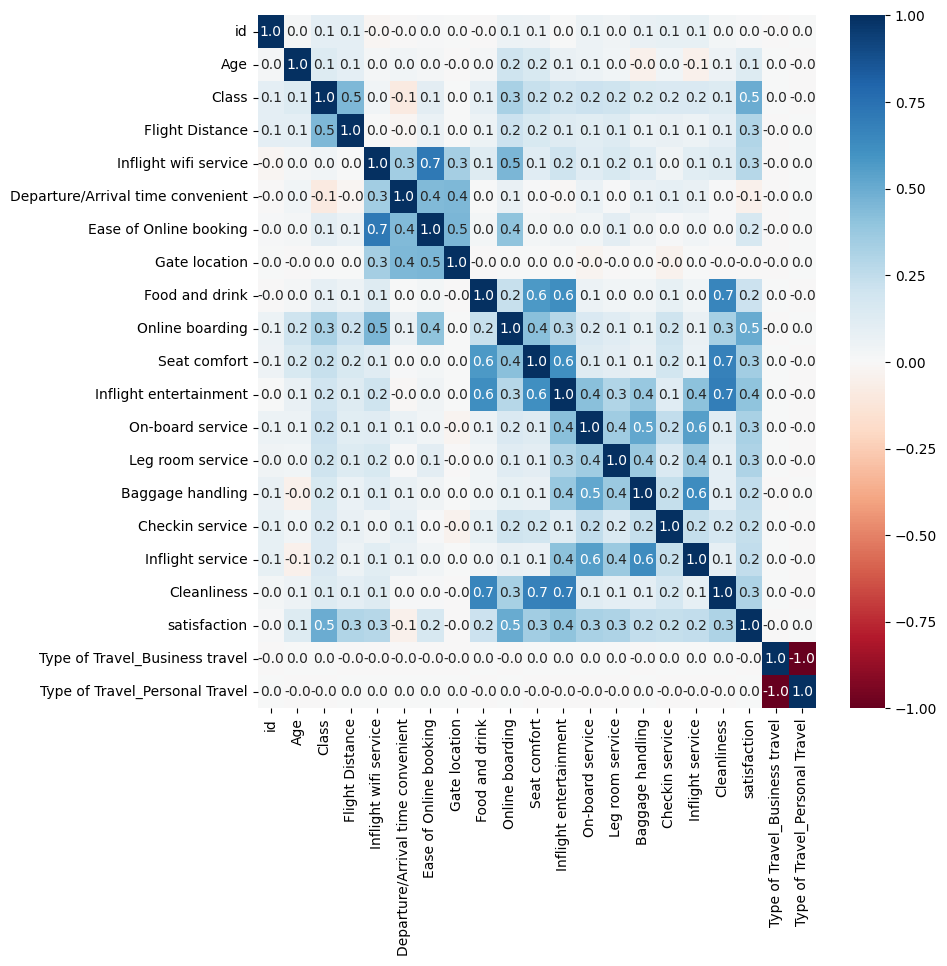

In [29]:
# creating a correlation heatmap for the variables
plt.figure(figsize = (9, 9))
corr_mat = sns.heatmap(df_encoded.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".1f", cmap = "RdBu")

There are quite a few variables that seem correlated, as defined by the coefficient being greater than 0.5. Class is an interesting variable to look at since it is analogous to socioeconomic class. Here is a list of a few notable correlations with the Class variable that may be worth exploring in our EDA section that follows:

- Overall, Class has a higher number of at least moderately positive correlations with the feature variables than others. This makes a lot of sense since those sitting at better, more comfortable (and expensive) seats are probably more satisfied in general than lower class seats.
- Class is also moderately correlated with "Online boarding." This relationship may arise through the confounding variable of "flight experience." That is, those who have higher class tickets are more likely to have flown more often, and are more used to and place higher value on the technology of a flight experience.
- Class is correlated with flight distance. This intuitively makes sense because the longer a flight is, the bigger the plane and the higher the number of "Business" and "Eco Plus" seats.

### Age and feature ratings

We first start off with some of the control variables — age. One question we may ask is, do different age groups prioritize or tend to rate different features higher? What is the relationship between age and other control variables? For example, older people may have higher class tickets because they value seat comfort more. It could also be that the younger you are, the more picky you are with what movies and TV shows are available to watch, suggesting an inverse relationship.

#### Distribution of ages

Before anything, let's take a look at the distribution of ages in our dataset. The histogram shows a relatively uniform distribution for ages 20-60, which cover the vast majority of our dataset.

Text(0.5, 1.0, 'Distribution of ages')

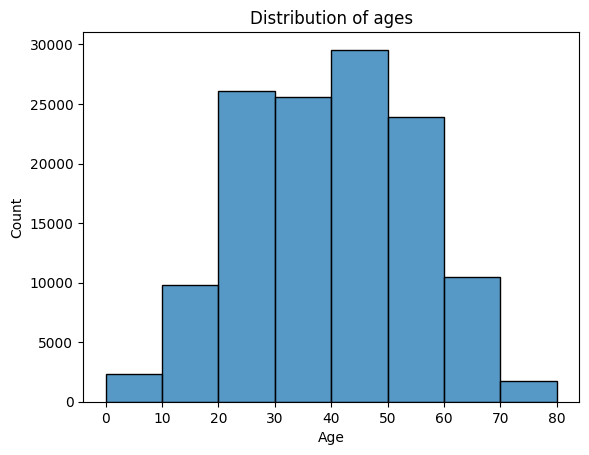

In [30]:
# plotting a histogram to check the distribution of ages
sns.histplot(data = df, x = "Age", bins = range(0, 90, 10))
plt.title("Distribution of ages")

#### Age and class

Okay, now let's examine the aforementioned relationship between age and class: do older people tend to go "Business" more? Compared to the histogram above, those on business class do seem to be older than those who were on "Eco" or "Eco Plus" class. This does confirm some of our intuitive predictions between age and class!

Text(0.5, 1.0, 'Distribution of passenger class for different ages')

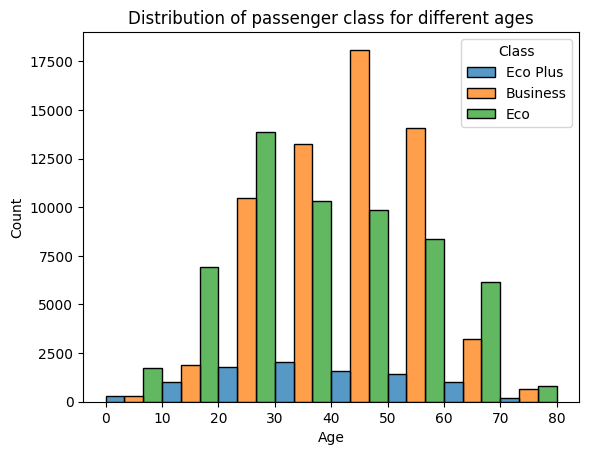

In [31]:
sns.histplot(data = df, x = "Age", hue = "Class", bins = range(0, 90, 10), multiple = "dodge")
plt.xticks(range(0, 90, 10))
plt.title("Distribution of passenger class for different ages")

#### Age and seat comfort

We explore below the relationship between age and seat comfort ratings. Though the rating differences aren't too high, the relationship is strictly positive until the 61+ age group. One reason why this may be so is because younger people tend to be more squirmish and "fit", leading to a higher likelihood of feeling uncomfortable sitting in the same seat for long periods of time.

For airlines, an important implication of this may be that, when segmenting their consumer base by age groups, they should present younger consumers with seats with more leg space and better overall comfort.

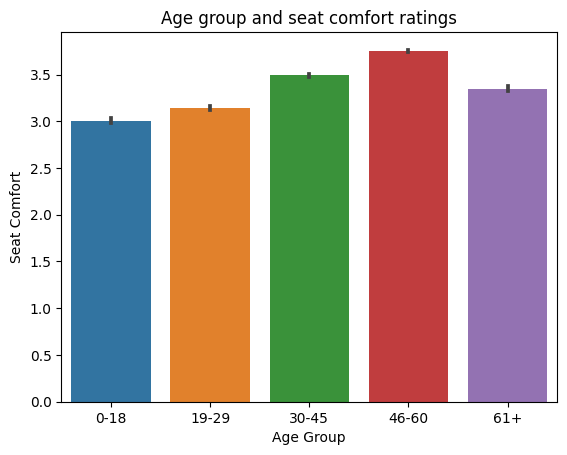

In [32]:
# Define age groups
bins = [0, 18, 29, 45, 60, np.inf]
labels = ['0-18', '19-29', '30-45', '46-60', '61+']

# Create a new variable 'age_group'
df["age_group"] = pd.cut(df['Age'], bins = bins, labels = labels)

# Barplot using seaborn
sns.barplot(x = "age_group", y = 'Seat comfort', data = df)
plt.xlabel('Age Group')
plt.ylabel('Seat Comfort')
plt.title("Age group and seat comfort ratings")
plt.show()

#### Age and flight distance

The bar plot below parallels the "strictly increasing" relationship that was present between age and seat comfort ratings. The positive relationship here also makes sense because older people tend to have more business trips, have more wealth to afford longer-distance vacations, etc.

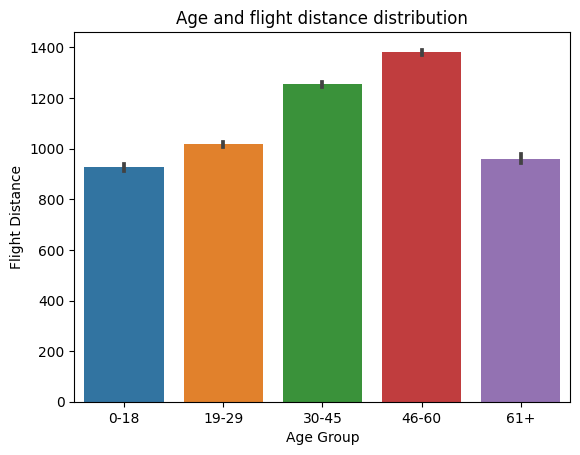

In [33]:
# Define age groups
bins = [0, 18, 29, 45, 60, np.inf]
labels = ['0-18', '19-29', '30-45', '46-60', '61+']

# Create a 'age_group' variable again
df["age_group"] = pd.cut(df['Age'], bins = bins, labels=labels)

# Barplot using seaborn
sns.barplot(x = "age_group", y = 'Flight Distance', data = df)
plt.xlabel('Age Group')
plt.ylabel('Flight Distance')
plt.title("Age and flight distance distribution")
plt.show()

### Distribution of variables and features

#### Customer satisfaction

There are slightly more neutral or dissatisfied customers than there are just satisfied. Given that the former encompasses *both* neutral and dissatisfied, we can assume that the majority of customers feel at least neutral about their flight experience.

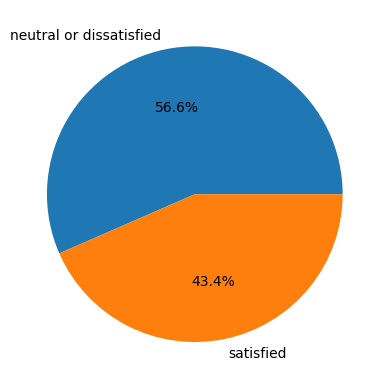

In [34]:
fig, ax = plt.subplots()
ax.pie(df["satisfaction"].value_counts().tolist(), labels = df["satisfaction"].unique(), autopct = "%1.1f%%")
plt.show()

#### Customer loyalty

The plot below shows the distribution of the "Customer Type" variable — specifically describing their loyalty. Although this is not explicitly defined in the original dataset, we can assume it relates to how many of a customer's total flights are bought from one specific airline.

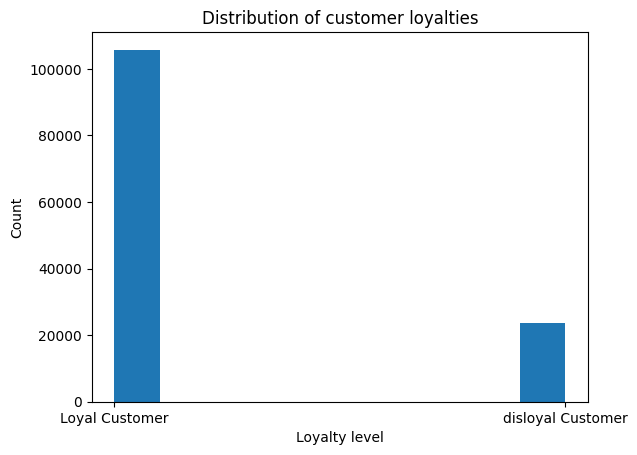

In [36]:
plt.hist(data = df, x = "Customer Type")
plt.title("Distribution of customer loyalties")
plt.xlabel("Loyalty level")
plt.ylabel("Count");

#### Flight distance

We can see from the flight distance histogram below that the vast majority of flights are less than 1000 miles. The distribution is right skewed.

Text(0.5, 0, 'Flight Distance (mi)')

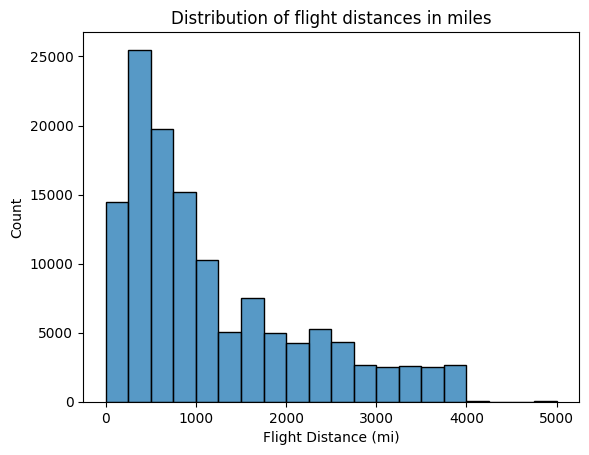

In [37]:
sns.histplot(data = df, x = "Flight Distance", bins = range(0, 5001, 250))
plt.title("Distribution of flight distances in miles")
plt.xlabel("Flight Distance (mi)")

## Modeling

### Additional Preprocessing

Although we did perform some encoding in our "Preliminary Processing" step, we encode again for robustness and better alignment with our modeling procedures and objectives.

In [38]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Encoding categorical features 'Gender', 'Class', and 'Type of Travel'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Class'] = le.fit_transform(df['Class'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])

# Scaling numerical features 'Flight Distance' and 'Age'
scaler = StandardScaler()
df[['Flight Distance', 'Age']] = scaler.fit_transform(df[['Flight Distance', 'Age']])

In [39]:
# Selecting the features and target variable

# Features
X = df.drop(columns=['satisfaction', 'id'])

# Target variable
y = df['satisfaction']

### Preprocessing Pipeline

Baseline model: Logistic Regression. We use this as a reference to contextualize the performance results. The following code sets up preprocessing pipelines for numerical and categorical variables. First, we identify the numerical and categorical variables in the X dataframe. Second, we create two objects to impute missing values in numerical and categorical variables using each column's mean value, respectively. Then, we combine the numerical and categorical preprocessors. The result of this block can be used as input to the logistic regression model.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

# Create the numerical preprocessor pipeline
num_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create the categorical preprocessor pipeline
cat_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the numerical and categorical preprocessors in a single preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_preprocessor, num_cols),
    ('cat', cat_preprocessor, cat_cols)
])

### Logistic Regression

#### Initialization & Pipeline

We create a 'LogisticRegression' object and a 'Pipeline' object that combines the 'preprocessor' object with the logistic regression model. Then, we split the data into training and testing set. After that, we call the 'fit' model to train the logistic regression model on the training set.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression

# Initializing Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)

# Creating a pipeline for preprocessing and logistic regression
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('log_reg', log_reg)
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the logistic regression model to the training data
model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-boar...
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Customer Type', 'age_group'], dtype='object'))])),
                ('log_reg', LogisticRegression(max_iter=1000, random_state=0))])

#### Metrics

We calculate the accuracy of the logistic regression model using cross-validation and the training and test sets. 

In [42]:
from sklearn.model_selection import cross_val_score

# Defining a function to calculate accuracy
def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Calculating the accuracy of the logistic regression model on the training data
lr_training_acc = accuracy(y_train, model_lr.predict(X_train))

# Calculating the cross-validation accuracy of the logistic regression model
lr_cv_acc = np.mean(cross_val_score(model_lr, X_train, y_train, cv=3))

# Calculating the accuracy of the logistic regression model on the test data
lr_test_acc = accuracy(y_test, model_lr.predict(X_test))

#### Cross Validation and Accuracy

The code creates a bar plot to visualize the performance of the logistic regression model on the training, cross-validation, and test sets. This plot can help visualize the performance of the logistic regression model on different datasets, allowing us to compare the accuracy scores and identify potential issues such as overfitting or underfitting. 

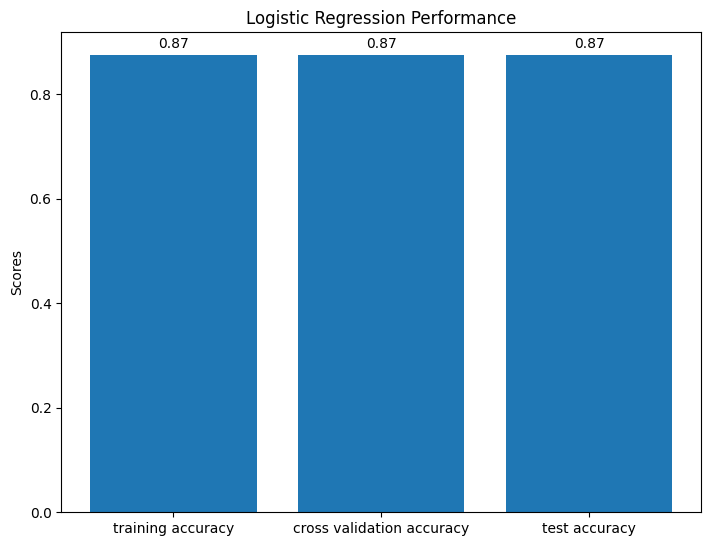

In [43]:
# Plotting the performance of the logistic regression model

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["training accuracy", "cross validation accuracy", "test accuracy"]
accuracies = [lr_training_acc, lr_cv_acc, lr_test_acc]
pps = ax.bar(labels,accuracies)
for p in pps:
   height = p.get_height()
   ax.annotate(format(height, ".2f"),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha='center', va='bottom')
ax.set_ylabel('Scores')
ax.set_title('Logistic Regression Performance')
plt.show()

#### Confusion Matrix

The code calculates and plots the confusion matrix for the logistic regression model on the test set. The resulting plot displays the true and predicted labels in the x- and y-axis, respectively, and the cell values indicate the number of observations in each category.

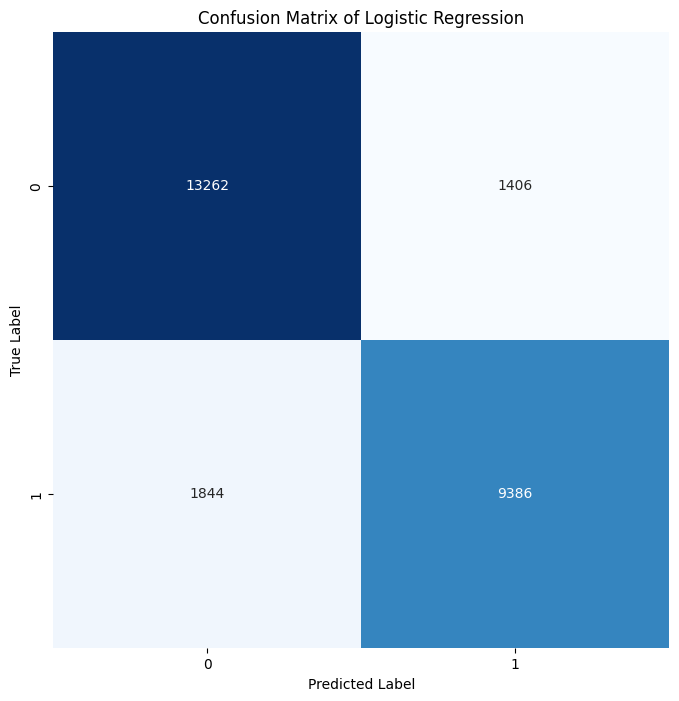

In [44]:
from sklearn.metrics import confusion_matrix

# Predicting the target variable for the test data
y_pred = model_lr.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest (Entire Sample)

#### Initialization & Pipeline

The code initializes a random forest classifier, support vector machine classifier, and XGBoost classifier. The resulting voting_classifier object can be used to fit a model to the data and make predictions. 

In [45]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Initializing the Random Forest Classifier
rf = RandomForestClassifier(random_state=0)

# Initializing the Support Vector Machine Classifier
svm = SVC(probability=True, random_state=0)

# Initializing the XGBoost Classifier
xgb = XGBClassifier(random_state=0)

# Combining the classifiers using soft voting
voting_classifier = VotingClassifier(
    estimators=[('rf', rf), ('svm', svm), ('xgb', xgb)],
    voting='soft')

The code creates a pipeline that includes preprocessing and a random forest classifier. The preprocessor object defined earlier is included as a preprocessing step in the pipeline. The fit method is called on the pipeline object to train the model on the training set.

In [47]:
# Creating a pipeline for preprocessing and Random Forest Classifier
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rf', rf)
                             ])

In [48]:
# Fitting the Random Forest Classifier to the training data
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-boar...ng',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Customer Type', 'age_group'], dtype='object'))])),
                ('rf', RandomForestClassifier(random_state=0))])

#### Metrics

The code calculates the accuracy of the random forest classifier using cross-validation and the training and test sets. The cross-validation accuracy provides an estimate of the performance of the random forest classifier on new data. 

In [49]:
# Calculating the accuracy of the Random Forest Classifier on the training data
rf_training_acc = accuracy(y_train, model_rf.predict(X_train))

# Calculating the cross-validation accuracy of the Random Forest Classifier
rf_cv_acc = np.mean(cross_val_score(model_rf, X_train, y_train, cv=3))

# Calculating the accuracy of the Random Forest Classifier on the test data
rf_test_acc = accuracy(y_test, model_rf.predict(X_test))

#### Cross Validation and Accuracy

The code creates a bar plot to visualize the performance of the random forest classifier on the training, cross-validation, and test sets. 

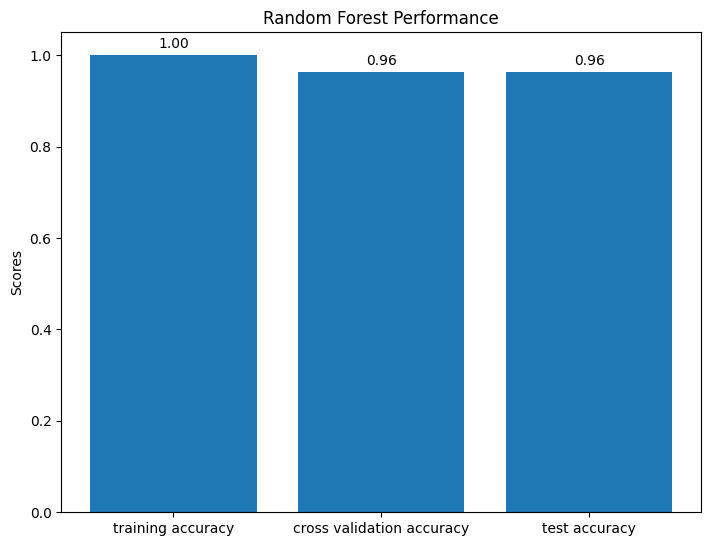

In [50]:
# Plotting the performance of the Random Forest Classifier
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["training accuracy", "cross validation accuracy", "test accuracy"]
accuracies = [rf_training_acc, rf_cv_acc, rf_test_acc]
pps = ax.bar(labels,accuracies)
for p in pps:
   height = p.get_height()
   ax.annotate(format(height, ".2f"),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), 
      textcoords="offset points",
      ha='center', va='bottom')
ax.set_ylabel('Scores')
ax.set_title('Random Forest Performance')
plt.show()

#### Confusion Matrix

The code calculates and plots the confusion matrix for the random forest classifier on the test set. The resulting plot displays the true and predicted labels in the x- and y-axis, respectively, and the cell values indicate the number of observations in each category. 

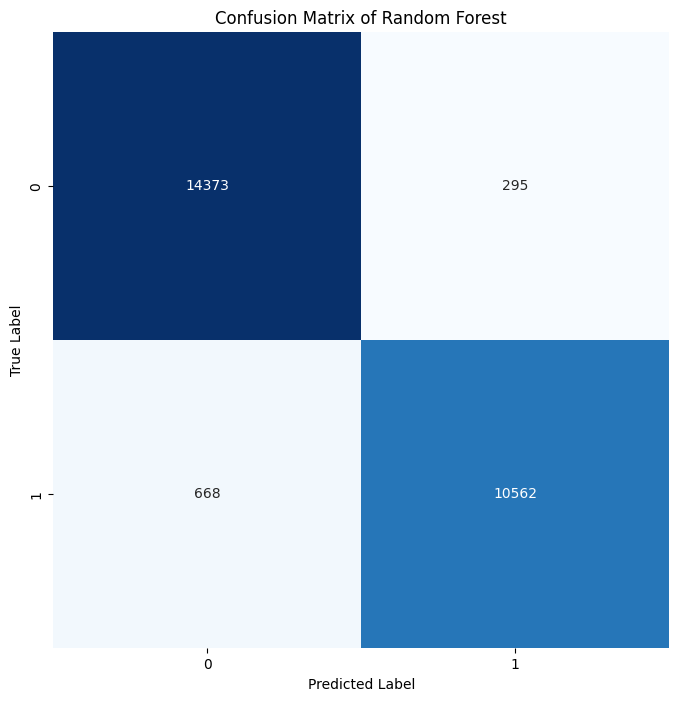

In [51]:
from sklearn.metrics import confusion_matrix

# Predicting the target variable for the test data using the Random Forest Classifier
y_pred = model_rf.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Feature Importance

The code gets the feature importances from the random forest classifier and creates a bar plot to visualize the top 10 most important features. This plot can help identify which features are most important for predicting customer satisfaction according to the random forest classifier. It can be used to guide further analysis and feature engineering.

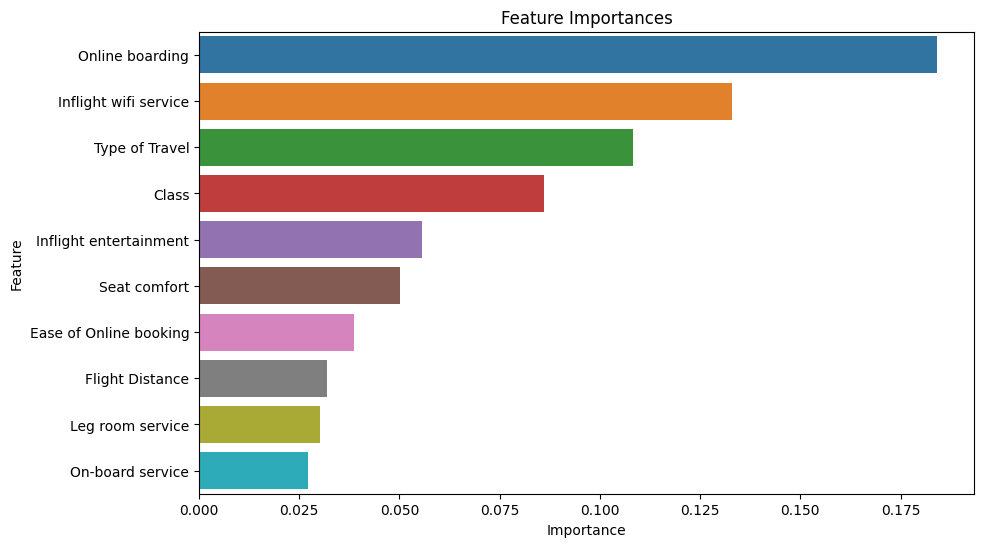

In [52]:
# Getting the feature importances from the Random Forest Classifier
random_forest_model = model_rf.named_steps['rf']
feature_importances = random_forest_model.feature_importances_

# Get the preprocessor from the pipeline
preprocessor = model_rf.named_steps['preprocessor']

# Get the feature names after preprocessing
numerical_features = preprocessor.transformers_[0][-1]
categorical_columns = ['Customer Type', 'Age_group']
categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_columns)
all_features = np.concatenate([numerical_features, categorical_features])

# Create a DataFrame with the processed feature names and their corresponding importances
features = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})

# Sort the DataFrame based on the importance values
sorted_features = features.sort_values(by='Importance', ascending=False).head(10)

# Plot the feature importances using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Individual Features vs. Satisfaction

##### Inflight WiFi Service

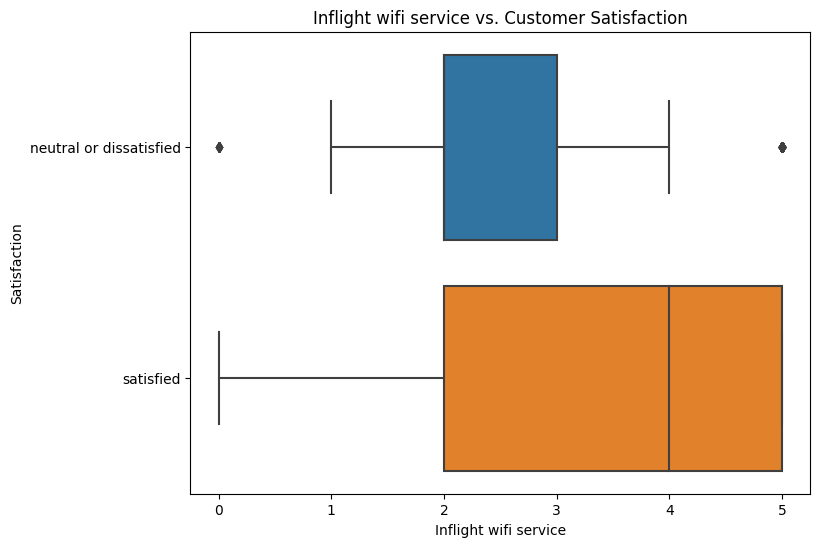

In [53]:
# Creating a copy of the training data with the target variable
data_with_satisfaction = X_train.copy()
data_with_satisfaction['satisfaction'] = y_train

# Plotting the relationship between Inflight wifi service and customer satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='Inflight wifi service', y='satisfaction', data=data_with_satisfaction)
plt.title('Inflight wifi service vs. Customer Satisfaction')
plt.xlabel('Inflight wifi service')
plt.ylabel('Satisfaction')
plt.show()

##### Inflight Entertainment

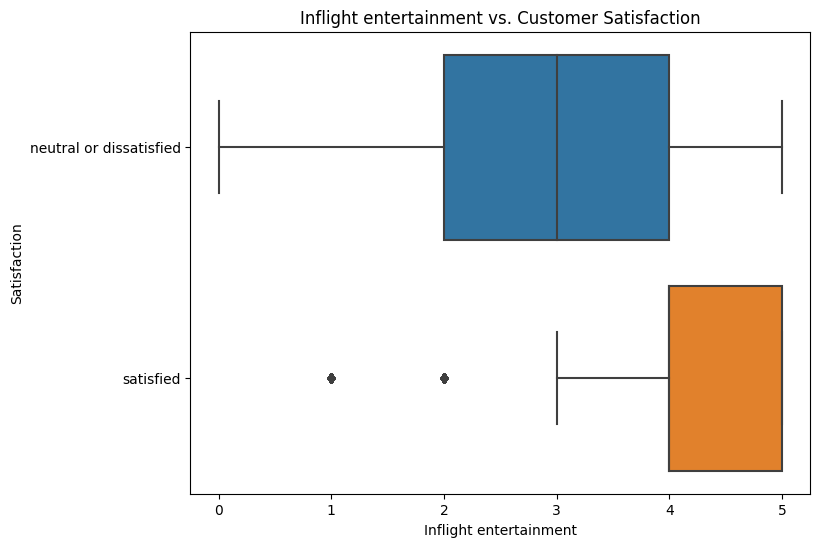

In [54]:
# Creating a copy of the training data with the target variable
data_with_satisfaction = X_train.copy()
data_with_satisfaction['satisfaction'] = y_train

# Plotting the relationship between Inflight entertainment and customer satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='Inflight entertainment', y='satisfaction', data=data_with_satisfaction)
plt.title('Inflight entertainment vs. Customer Satisfaction')
plt.xlabel('Inflight entertainment')
plt.ylabel('Satisfaction')
plt.show()

### Random Forest (Gender Subsamples)

***How do male and female travelers value features differently?***

#### Data Wrangling and Splitting

In [55]:
# Filter the data for differnt gender
# note that in the dataframe, female is 1 and male is 0
male_data = df[df['Gender'] == 0]
female_data = df[df['Gender'] == 1]

In [56]:
# Splitting the data for male customers into training and test sets
X_male = male_data.drop('satisfaction', axis=1)
y_male = male_data['satisfaction']
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Splitting the data for female customers into training and test sets
X_female = female_data.drop('satisfaction', axis=1)
y_female = female_data['satisfaction']
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

#### Implementing Random Forest

In [57]:
# Training the Random Forest model on the male customer data
model_rf.fit(X_male_train, y_male_train)

# Extracting the feature importances for the male customer data
feature_importances_male = model_rf.named_steps['rf'].feature_importances_

# Training the Random Forest model on the female customer data
model_rf.fit(X_female_train, y_female_train)

# Extracting the feature importances for the female customer data
feature_importances_female = model_rf.named_steps['rf'].feature_importances_

In [58]:
# Creating a DataFrame for the male customer data with processed feature names and their corresponding importances
features_male = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances_male})

# Creating a DataFrame for the female customer data with processed feature names and their corresponding importances
features_female = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances_female})

# Sorting the male customer data DataFrame based on the importance values
sorted_features_male = features_male.sort_values(by='Importance', ascending=False)

# Sorting the female customer data DataFrame based on the importance values
sorted_features_female = features_female.sort_values(by='Importance', ascending=False)

In [59]:
# Storing the top 10 features for male and female
top_male_features = sorted_features_male.head(10)
top_female_features = sorted_features_female.head(10)

In [60]:
# Combine the top features for each gender into a single DataFrame
top_features_comparison = pd.concat([
    sorted_features_male.head(10).reset_index(drop=True),
    sorted_features_female.head(10).reset_index(drop=True)
], axis=1)
top_features_comparison.columns = ['Male_Feature', 'Male_Importance', 'Female_Feature', 'Female_Importance']
print("Top Features Comparison:")
print(top_features_comparison)

Top Features Comparison:
             Male_Feature  Male_Importance          Female_Feature  \
0         Online boarding         0.158641         Online boarding   
1   Inflight wifi service         0.137675   Inflight wifi service   
2          Type of Travel         0.104073          Type of Travel   
3                   Class         0.090530                   Class   
4  Inflight entertainment         0.053588            Seat comfort   
5        Leg room service         0.045028  Inflight entertainment   
6            Seat comfort         0.040432  Ease of Online booking   
7  Ease of Online booking         0.039003         Flight Distance   
8         Flight Distance         0.035622        On-board service   
9                     Age         0.034315                     Age   

   Female_Importance  
0           0.230938  
1           0.121054  
2           0.089366  
3           0.077442  
4           0.058848  
5           0.048539  
6           0.034711  
7           0.033900

#### Feature Importance (Visualizations)

In the barplots below, we demonstrate how male and female passengers value flight features. Higher numbers and longer bars indicate that the passenger of specific gender places higher importance/value.

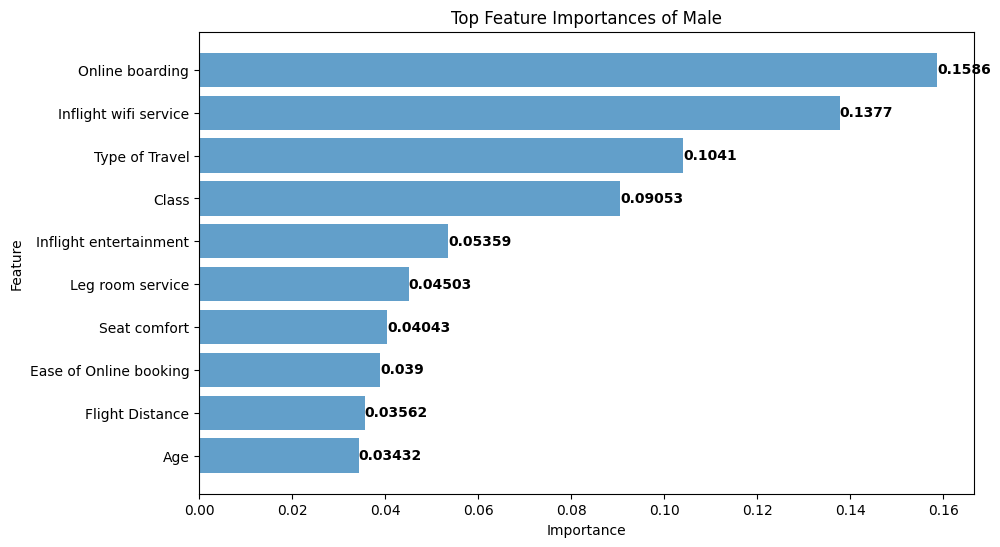

In [61]:
import numpy as np

# Sorting the features for plotting purposes
top_male_features = top_male_features.sort_values(by='Importance', ascending=True)
top_female_features = top_female_features.sort_values(by='Importance', ascending=True)

# Plotting Male's Feature Importance
plt.figure(figsize=(10, 6))
bar_width = 0.8
y_positions = np.arange(len(top_male_features))
male_bars = plt.barh(y_positions, top_male_features['Importance'], height=bar_width, label='Male', alpha=0.7)
plt.yticks(y_positions, top_male_features['Feature'])
plt.title('Top Feature Importances of Male')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add value labels for each bar
for i, male_importance in enumerate(top_male_features['Importance']):
    plt.text(male_importance, i, f"{male_importance:.4}", ha='left', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()

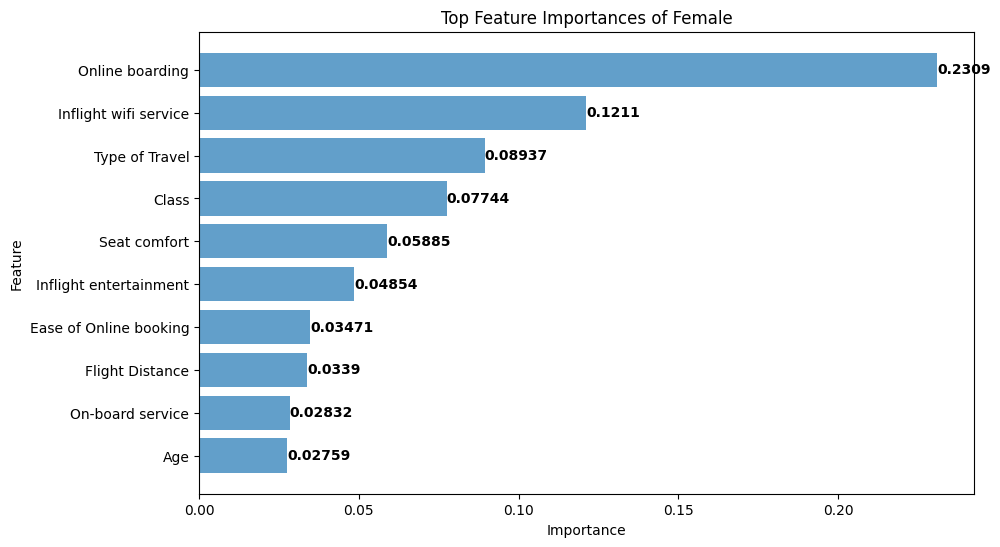

In [62]:
# Plotting Female's Feature Importance
plt.figure(figsize=(10, 6))
bar_width = 0.8
y_positions = np.arange(len(top_female_features))
male_bars = plt.barh(y_positions, top_female_features['Importance'], height=bar_width, label='Female', alpha=0.7)
plt.yticks(y_positions, top_female_features['Feature'])
plt.title('Top Feature Importances of Female')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add value labels for each bar
for i, female_importance in enumerate(top_female_features['Importance']):
    plt.text(female_importance, i, f"{female_importance:.4}", ha='left', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()

### Random Forest (Class Subsamples)

#### Data Wrangling and Splitting

In [63]:
# Filter the data for each class
# Note that Eco is 0, Eco Plus is 1, Business is 2
class_0_data = df[df['Class'] == 0]
class_1_data = df[df['Class'] == 1]
class_2_data = df[df['Class'] == 2]

In [64]:
# For the Class 0 data
X_class0 = class_0_data.drop('satisfaction', axis=1)
y_class0 = class_0_data['satisfaction']
X_class0_train, X_class0_test, y_class0_train, y_class0_test = train_test_split(X_class0, y_class0, test_size=0.2, random_state=42)

# For the Class 1 data
X_class1 = class_1_data.drop('satisfaction', axis=1)
y_class1 = class_1_data['satisfaction']
X_class1_train, X_class1_test, y_class1_train, y_class1_test = train_test_split(X_class1, y_class1, test_size=0.2, random_state=42)

# For the Class 2 data
X_class2 = class_2_data.drop('satisfaction', axis=1)
y_class2 = class_2_data['satisfaction']
X_class2_train, X_class2_test, y_class2_train, y_class2_test = train_test_split(X_class2, y_class2, test_size=0.2, random_state=42)

#### Implementing Random Forest

In [65]:
# Fitting the random forest model on Class 0 data
model_rf.fit(X_class0_train, y_class0_train)
feature_importances_class0 = model_rf.named_steps['rf'].feature_importances_

# Fitting the random forest model on Class 1 data
model_rf.fit(X_class1_train, y_class1_train)
feature_importances_class1 = model_rf.named_steps['rf'].feature_importances_

# Fitting the random forest model on Class 2 data
model_rf.fit(X_class2_train, y_class2_train)
feature_importances_class2 = model_rf.named_steps['rf'].feature_importances_

In [66]:
# Creating dataframes for the features and their respective importance
features_class0 = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances_class0})
features_class1 = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances_class1})
features_class2 = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances_class2})

# Sorting the features for plotting purposes
sorted_features_class0 = features_class0.sort_values(by='Importance', ascending=False)
sorted_features_class1 = features_class1.sort_values(by='Importance', ascending=False)
sorted_features_class2 = features_class2.sort_values(by='Importance', ascending=False)

In [67]:
# Storing the top 10 features for each class
top_class0_features = sorted_features_class0.head(10)
top_class1_features = sorted_features_class1.head(10)
top_class2_features = sorted_features_class2.head(10)

#### Feature Importance (Visualizations)

In the barplots below, we demonstrate how Eco, Eco Plus, and Business Class passengers value flight features. Higher numbers and longer bars indicate that the passenger of specific gender places higher importance/value.

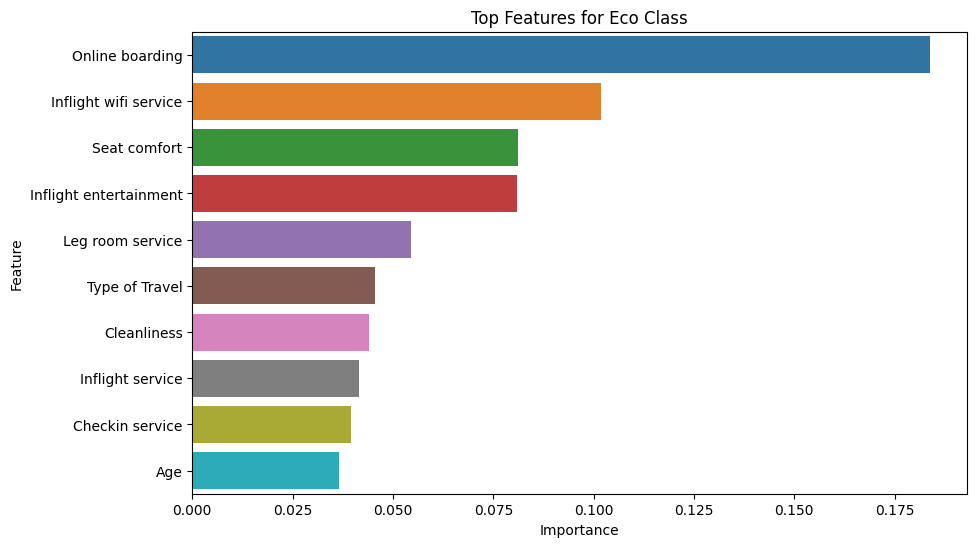

In [68]:
# Plotting a barplot for Class 0 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_class0_features)
plt.title('Top Features for Eco Class')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

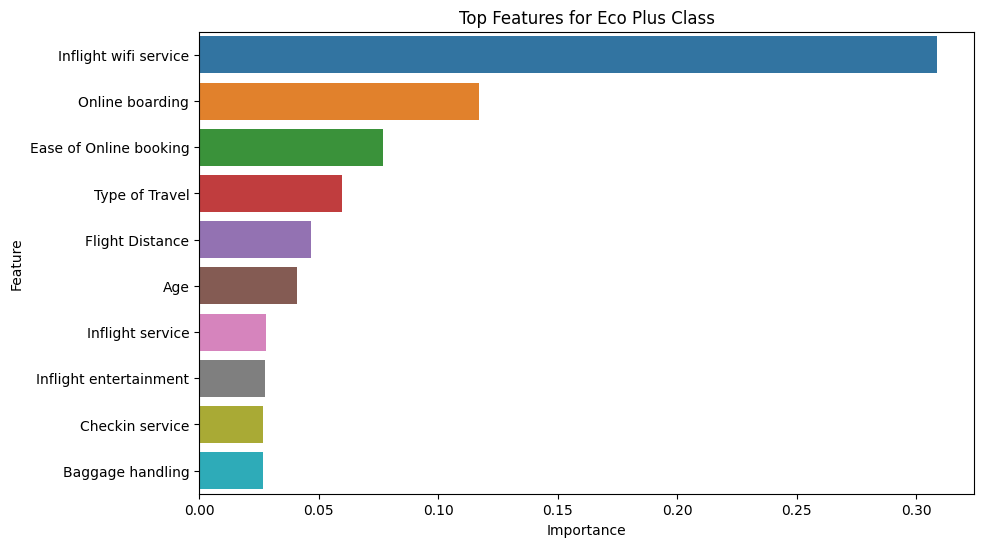

In [69]:
# Plotting a barplot for Class 1 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_class1_features)
plt.title('Top Features for Eco Plus Class')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

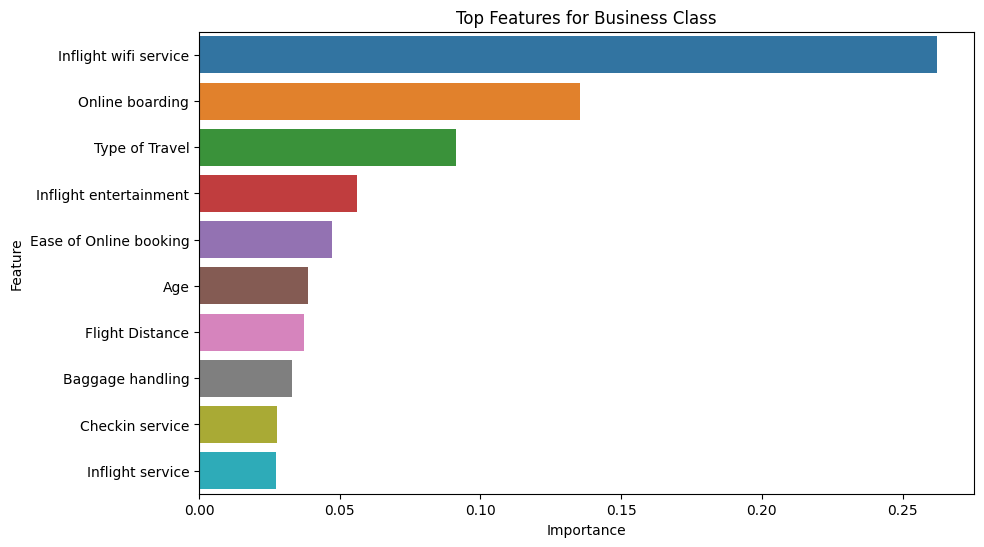

In [70]:
# Plotting a barplot for Class 2 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_class2_features)
plt.title('Top Features for Business Class')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Conclusions

### EDA

Utilizing encoding packages from scikit-learn, we were able to first find correlations between all variables in our dataset. Two variables extremely significant in determining customer segments that were explored in particular were "Class" and "Age," both of which had intuitive correlations with themselves and other feature variables such as seat comfort and flight distance. If we had deduced just from the correlation heatmap alone, we would conclude that our target variable of interest — satisfaction — was determined most by its most highly correlated variable of "Online boarding." 

Furthermore, from the aforementioned further exploration into the "Age" and "Class" variables, we could observe the following:
- Customers with higher Class levels tend to be traveling farther
- Older customers tend to travel further
- Customers with higher Class levels tend to provide better ratings for all dimensions of a flight: this is probably due to the additional comfort and luxury that higher Class provides
- As customers get older, they tend to be more likely to go on Business Class
- As customers get older, they tend to rate their seat comfort more favorably

Important pricing and business insights for airlines that follow from this portion of our EDA include:
- Older customer segments should be presented and targeted with flights that have a higher concentration of upper-Class seats
- If an airline wants to maintain an older customer base, it should aim to further improve/maintain seat comfort (leg room, cushion, etc.). If they want to appeal to a younger customer base, they may want to expand flight routes that are shorter in flight duration.

Histograms of a few additional secondary variables revealed:
- It is relatively safe to assume that more than half of the customers feel at least neutral about their flight
- The Class with the highest distribution was "Business" by a small margin over "Eco", then "Eco Plus" was a minority by far.
- Given that there are about five times as many "loyal customers" as there are "disloyal customers," campaigns to acquire new customer bases should be prioritized
- Flight distances are highly right-skewed, meaning the vast majority of flights are shorter distance, for which our EDA has revealed that younger people enjoy more

### Modeling

#### Improvement from logistic regression

The improvement from using logistic regression as the baseline model to using the random forest can be seen from the higher accuracy scores and the lower number of false negatives and false positives in the confusion matrix. The logistic regression model has a cross-validation accuracy of 0.87 and a test accuracy of 0.87. Meanwhile, the random forest model has a cross-validation accuracy of 0.96 and a test accuracy of 0.96, which is significantly higher. In the confusion matrix, the logistic regression model has 1401 false negatives and 1844 false positives, while the random forest model has only 274 false negatives and 648 false positives. This shows that the random forest model can better predict customer satisfaction than the logistic regression model accurately.

#### Random Forest (entire sample)

From the result of the random forest model we performed on the data set earlier, we can see that among all those variables, online boarding, inflight wifi service, and class are the three variables that the customers value the most, when comes to satisfaction. 

The importance of these three variables can be attributed to their direct impact on passengers’ experiences during their journey. 

An efficient online boarding process reduces waiting times and minimizes stress, contributing to a smoother travel experience. If passengers face difficulties during the boarding process, their initial impression of the airline may be negative, affecting their overall satisfaction.

As passengers increasingly rely on their devices for entertainment and work, having a good inflight wifi service is crucial. A reliable and fast wifi connection can make the journey more enjoyable and productive, especially for business travelers. In contrast, a poor wifi service can leave passengers feeling frustrated and unsatisfied.

The travel class passengers choose significantly affects their comfort and the amenities they receive during the flight. Higher travel classes generally offer more luxurious experiences, leading to higher satisfaction. As such, delivering on the expectations associated with the chosen class is crucial for maintaining passenger satisfaction.

On the other hand, the three not-so-important variables - ease of online booking, flight distance, and on-board service - might not have as much impact on passenger satisfaction 
due to the following reasons:

Although a smooth online booking process is essential, once completed, it may not significantly influence passengers' experiences during the flight. Passengers might weigh their in-flight experiences more heavily when determining overall satisfaction.

While the flight distance can affect the time passengers spend on the plane, it may not directly impact satisfaction. Passengers usually choose flights based on their travel needs, and as long as the airline meets their expectations regarding comfort and amenities, flight distance might not be a critical factor.

On-board service quality can be highly variable, depending on the individual staff members working on a particular flight. Some passengers may receive exceptional service on one flight, while others may have a less satisfactory experience on another. In addition, passengers' perceptions of on-board service can be highly subjective, depending on their individual expectations and preferences. Besides, most passengers have a baseline expectation for on-board service quality, and as long as the airline meets or slightly exceeds these expectations, it may not significantly impact overall satisfaction.  As a result, passengers might not weigh on-board service as heavily when evaluating their overall satisfaction with an airline.

#### Random Forest (gender)

Male and female travelers have different top priorities when it comes to their flight experience. For male travelers, online boarding and inflight wifi service are the most important features, while female travelers prioritize online boarding and inflight wifi service as well, but to a slightly lesser extent. Type of travel, class, and inflight entertainment are also important for both male and female travelers, but the rankings differ. Male travelers place a greater emphasis on the type of travel, whereas female travelers place more importance on seat comfort. Other features such as leg room service, ease of online booking, flight distance, and age are also considered important by both genders, but with varying degrees of importance. These differences in priorities suggest that airlines and travel companies should tailor their services and offerings to cater to male and female travelers' specific needs and preferences.

#### Random Forest (class)

The top features comparison between the three classes of flights (Eco, Eco Plus, and Business) reveals some similarities and differences in terms of feature importance. One common feature in all three classes is the "Online boarding" feature, which indicates the ease of checking in and boarding the flight through the airline's website. This feature is highly valued by all three classes, as it saves time and offers convenience for the passengers.

In the Eco class, the top two features are "Online boarding" and "Inflight wifi service". This suggests that passengers who fly Eco prioritize both the convenience of online boarding and the availability of inflight wifi service, which allows them to stay connected during their flight. Meanwhile, the "Seat comfort" and "Leg room service" also rank high in importance for Eco class passengers, highlighting their concern for comfort during the flight.

The feature that stands out the most for the Eco Plus class is the "Inflight wifi service", which has the highest feature importance among all three classes. This indicates that passengers who fly Eco Plus place a higher value on staying connected during their flight compared to those who fly Eco or Business. The second most important feature is "Online boarding", which aligns with the overall trend among all three classes. Other notable features include "Type of Travel", "Id," and "Inflight entertainment".

In the Business class, the top two features are "Inflight wifi service" and "Online boarding", which is consistent with the overall trend. However, "Type of Travel" ranks higher in importance compared to Eco and Eco Plus classes, suggesting that Business class passengers might be more concerned about their travel purpose and the type of trip they are taking. Other notable features include "Flight Distance," "Age," and "Cleanliness".

Overall, the differences in the top feature importance between the three classes can be attributed to each class of passengers' different priorities and expectations. The availability of inflight wifi service and online boarding are two of the most important features across all three classes, but the relative importance of other features, such as comfort, travel purpose, and connectivity, can vary depending on the class of flight.
